In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [7]:
log = LogisticRegression()
log.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [8]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
def merge_csv(gender_submission,test, train):
    df1 = pd.read_csv(gender_submission)
    df2 = pd.read_csv(test)
    df3 = pd.read_csv(train)
    return pd.concat([df1,df2,df3], ignore_index=True)

merged = merge_csv('gender_submission.csv','test.csv','train.csv')
merged.to_csv('merged.csv',index=False)
merged.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,897,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,898,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,900,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#dropping some of the columns
NEW = merged.drop(columns = ['PassengerId', 'Name'])
NEW

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1722,0.0,2.0,male,27.0,0.0,0.0,211536,13.00,NaN,S
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.00,B42,S
1724,0.0,3.0,female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
1725,1.0,1.0,male,26.0,0.0,0.0,111369,30.00,C148,C


In [23]:
NEW.dropna(inplace=True)

In [27]:
teenagers = NEW[(NEW['Age'] > 0) & (NEW['Age'] < 41)]
teenagers

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
837,1.0,1.0,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
839,1.0,1.0,female,35.0,1.0,0.0,113803,53.1000,C123,S
846,1.0,3.0,female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
857,1.0,2.0,male,34.0,0.0,0.0,248698,13.0000,D56,S
859,1.0,1.0,male,28.0,0.0,0.0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...
1689,1.0,1.0,female,16.0,0.0,1.0,PC 17592,39.4000,D28,S
1703,0.0,1.0,male,31.0,0.0,0.0,PC 17590,50.4958,A24,S
1708,0.0,1.0,male,33.0,0.0,0.0,695,5.0000,B51 B53 B55,S
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.0000,B42,S


In [28]:
men = NEW[(NEW['Age'] > 39) & (NEW['Age'] < 61) ]
men

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
842,0.0,1.0,male,54.0,0.0,0.0,17463,51.8625,E46,S
847,1.0,1.0,female,58.0,0.0,0.0,113783,26.5500,C103,S
888,1.0,1.0,female,49.0,1.0,0.0,PC 17572,76.7292,D33,C
898,0.0,1.0,male,45.0,1.0,0.0,36973,83.4750,C83,S
928,0.0,1.0,male,46.0,1.0,0.0,W.E.P. 5734,61.1750,E31,S
946,0.0,1.0,male,47.0,0.0,0.0,110465,52.0000,C110,S
960,0.0,1.0,male,54.0,0.0,1.0,35281,77.2875,D26,S
1010,0.0,1.0,male,56.0,0.0,0.0,17764,30.6958,A7,C
1013,0.0,1.0,female,50.0,0.0,0.0,PC 17595,28.7125,C49,C
1030,1.0,1.0,female,44.0,0.0,0.0,PC 17610,27.7208,B4,C


In [30]:
elderly = NEW[(NEW['Age'] > 59) & (NEW['Age'] < 81)]
elderly

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,0.0,1.0,male,65.0,0.0,1.0,113509,61.9792,B30,C
932,0.0,1.0,male,71.0,0.0,0.0,PC 17754,34.6542,A5,C
1006,0.0,1.0,male,61.0,0.0,0.0,111240,33.5000,B19,S
1088,0.0,1.0,male,62.0,0.0,0.0,113514,26.5500,C87,S
1111,1.0,1.0,female,63.0,1.0,0.0,13502,77.9583,D7,S
1202,1.0,1.0,female,60.0,1.0,0.0,110813,75.2500,D37,C
1274,0.0,1.0,male,64.0,1.0,4.0,19950,263.0000,C23 C25 C27,S
1292,0.0,1.0,male,65.0,0.0,0.0,13509,26.5500,E38,S
1423,1.0,1.0,male,60.0,1.0,1.0,13567,79.2000,B41,C
1461,0.0,1.0,male,61.0,0.0,0.0,36963,32.3208,D50,S


In [35]:
NEW['teenagers'] = teenagers['Age']
NEW['men'] = men['Age']
NEW['elderly'] = elderly['Age']
NEW.to_csv('NEW_with_teenagers.csv', index=False)
NEW

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,teenagers,men,elderly
837,1.0,1.0,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,38.0,NaN,NaN
839,1.0,1.0,female,35.0,1.0,0.0,113803,53.1000,C123,S,35.0,NaN,NaN
842,0.0,1.0,male,54.0,0.0,0.0,17463,51.8625,E46,S,NaN,54.0,NaN
846,1.0,3.0,female,4.0,1.0,1.0,PP 9549,16.7000,G6,S,4.0,NaN,NaN
847,1.0,1.0,female,58.0,0.0,0.0,113783,26.5500,C103,S,NaN,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1.0,1.0,female,47.0,1.0,1.0,11751,52.5542,D35,S,NaN,47.0,NaN
1708,0.0,1.0,male,33.0,0.0,0.0,695,5.0000,B51 B53 B55,S,33.0,NaN,NaN
1715,1.0,1.0,female,56.0,0.0,1.0,11767,83.1583,C50,C,NaN,56.0,NaN
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.0000,B42,S,19.0,NaN,NaN


In [36]:
NEW.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,teenagers,men,elderly
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,118.000000,59.000000,12.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,26.414576,49.313559,65.166667
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,10.173800,5.534296,5.890413
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.920000,40.000000,60.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,21.000000,45.250000,61.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,28.000000,49.000000,63.500000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,35.000000,53.500000,66.250000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,40.000000,60.000000,80.000000


In [37]:
NEW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 837 to 1725
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   183 non-null    float64
 1   Pclass     183 non-null    float64
 2   Sex        183 non-null    object 
 3   Age        183 non-null    float64
 4   SibSp      183 non-null    float64
 5   Parch      183 non-null    float64
 6   Ticket     183 non-null    object 
 7   Fare       183 non-null    float64
 8   Cabin      183 non-null    object 
 9   Embarked   183 non-null    object 
 10  teenagers  118 non-null    float64
 11  men        59 non-null     float64
 12  elderly    12 non-null     float64
dtypes: float64(9), object(4)
memory usage: 20.0+ KB


In [38]:
NEW.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
teenagers     65
men          124
elderly      171
dtype: int64

In [39]:
NEW.duplicated().sum()

1

<Axes: xlabel='teenagers', ylabel='count'>

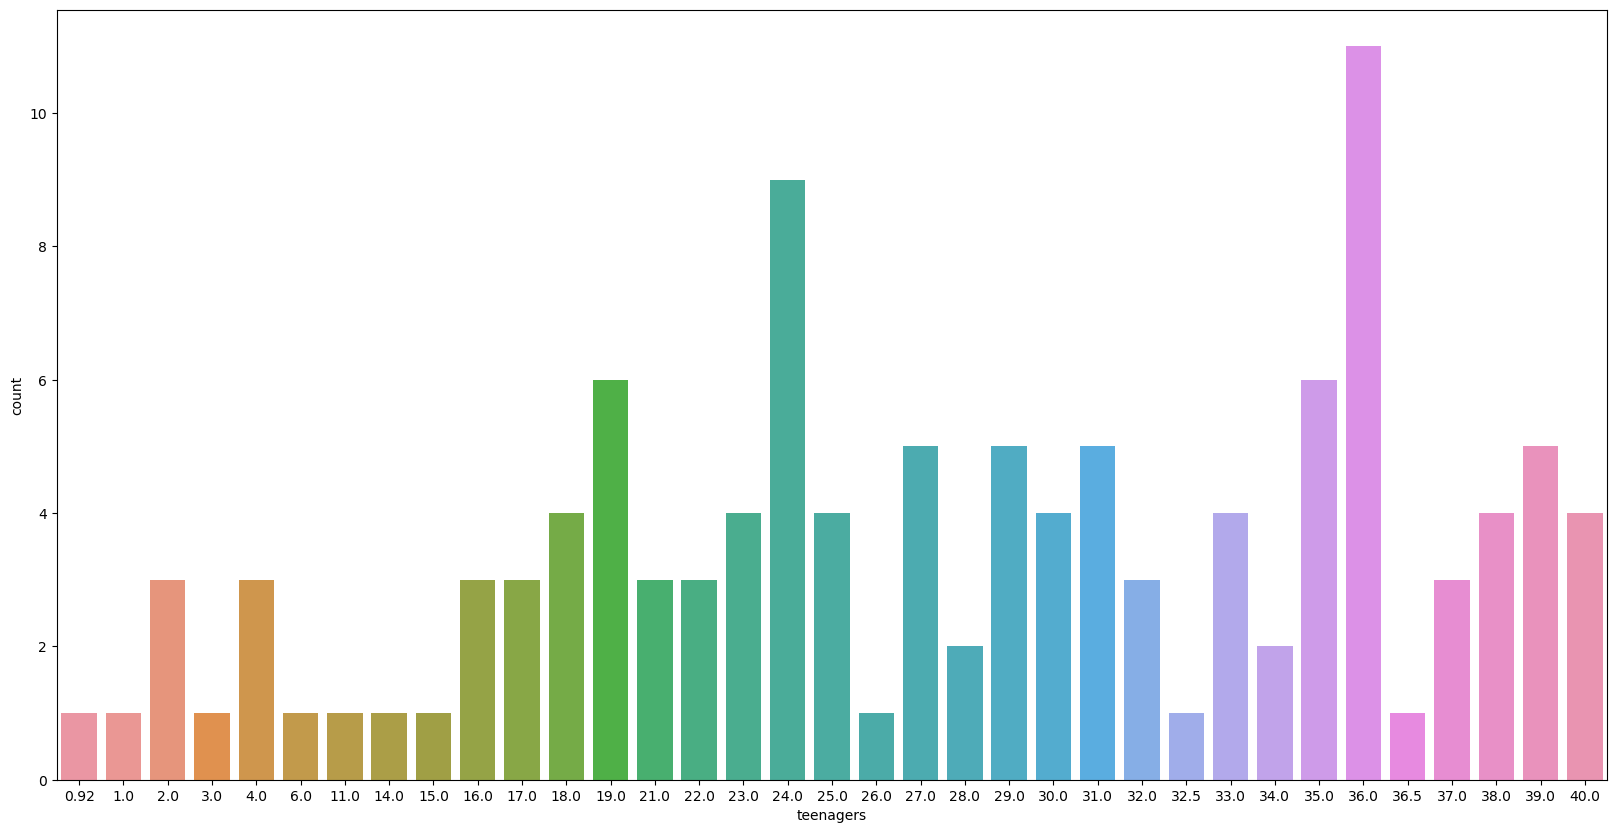

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x='teenagers',data=NEW)

<Axes: xlabel='men', ylabel='count'>

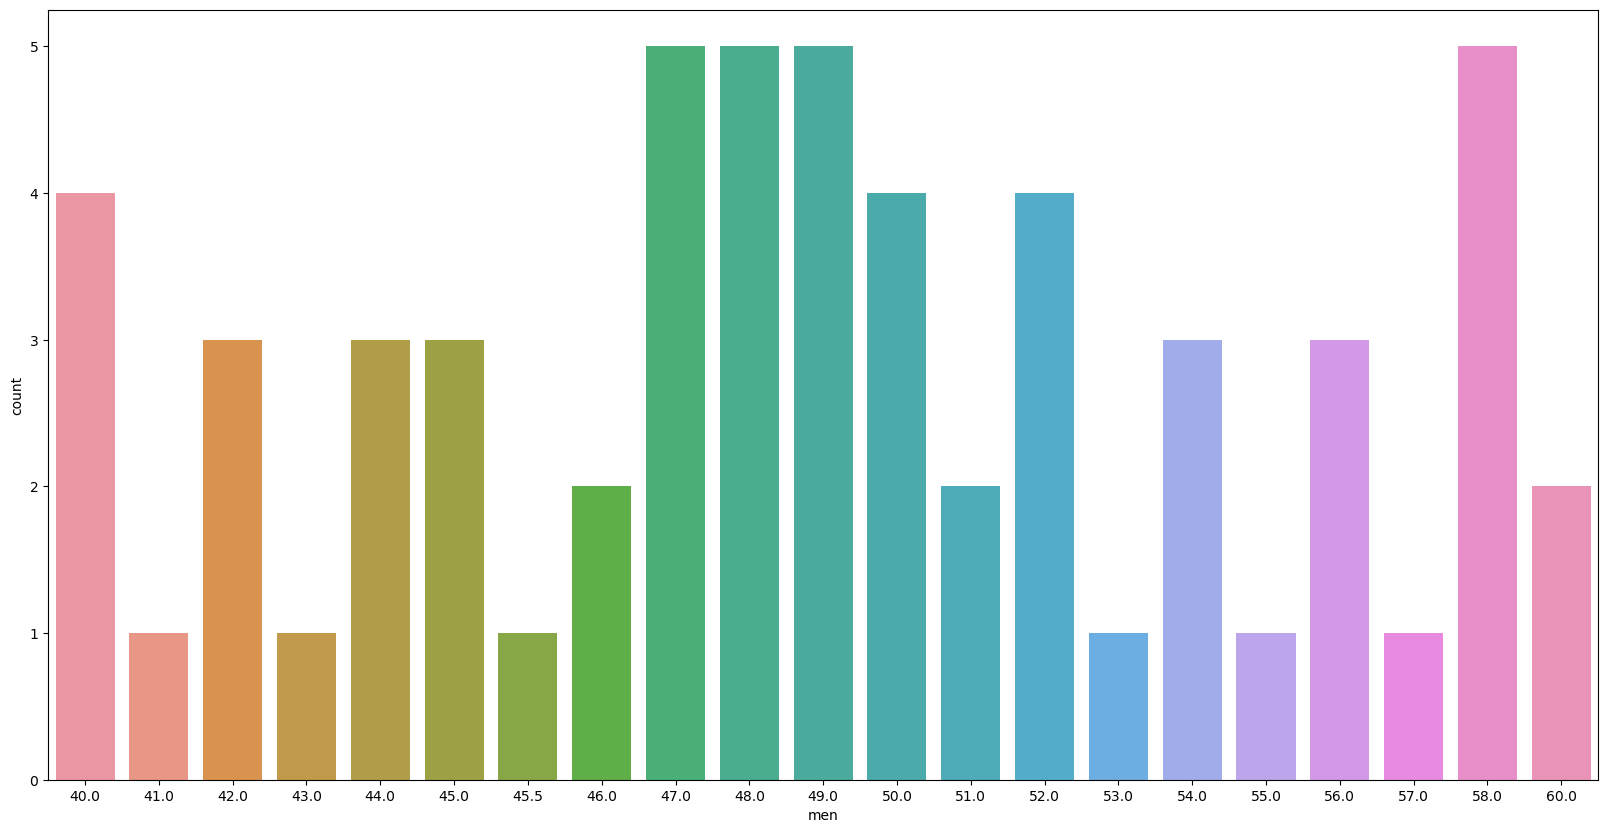

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x='men', data=NEW)

<Axes: xlabel='elderly', ylabel='count'>

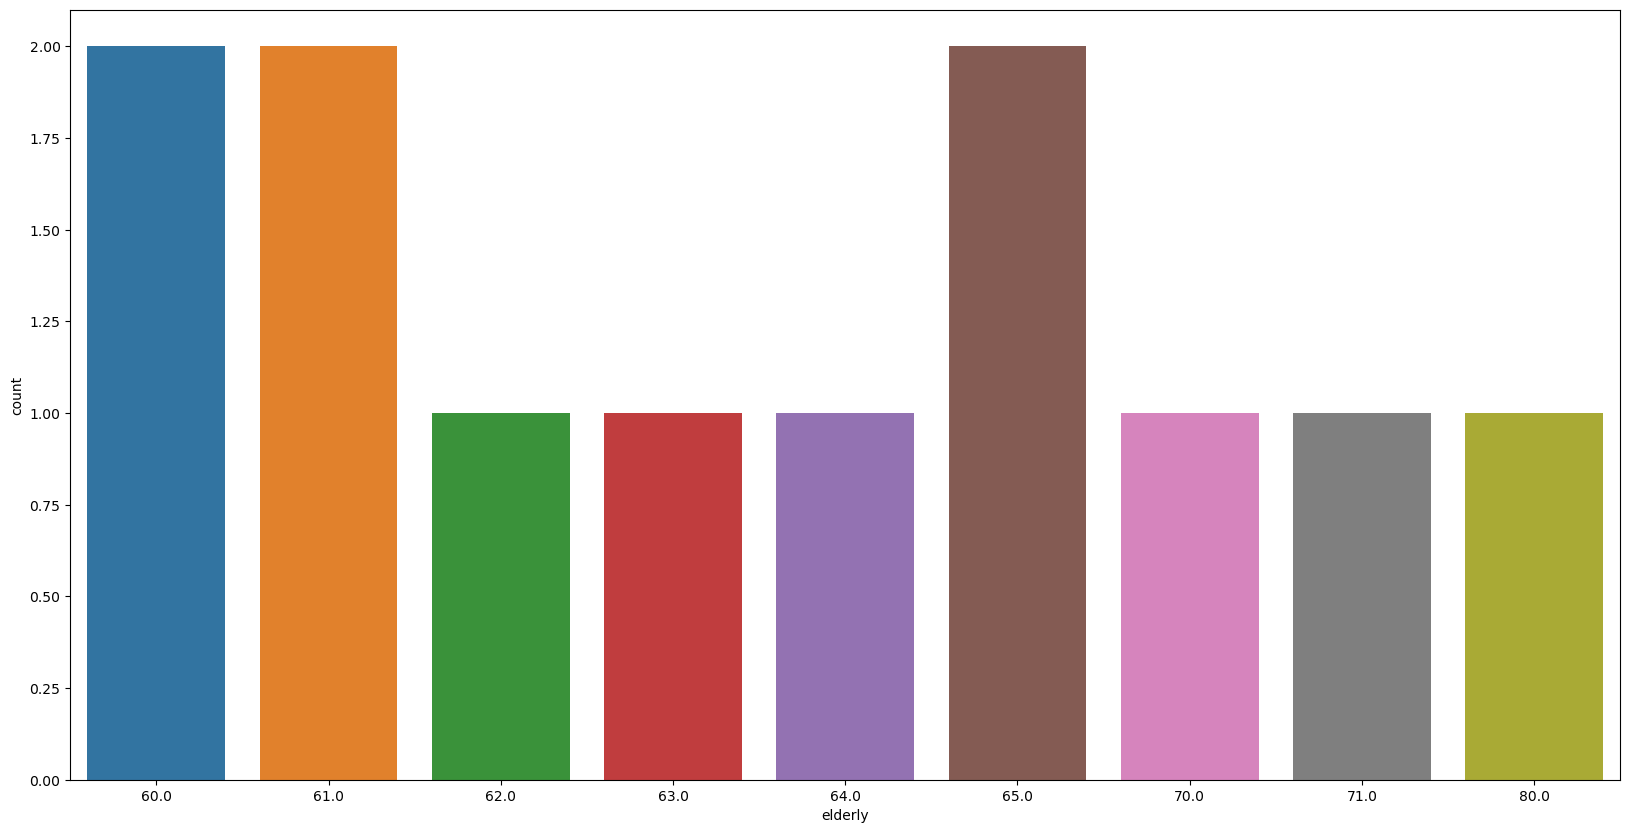

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='elderly',data=NEW)

<Axes: xlabel='Survived', ylabel='count'>

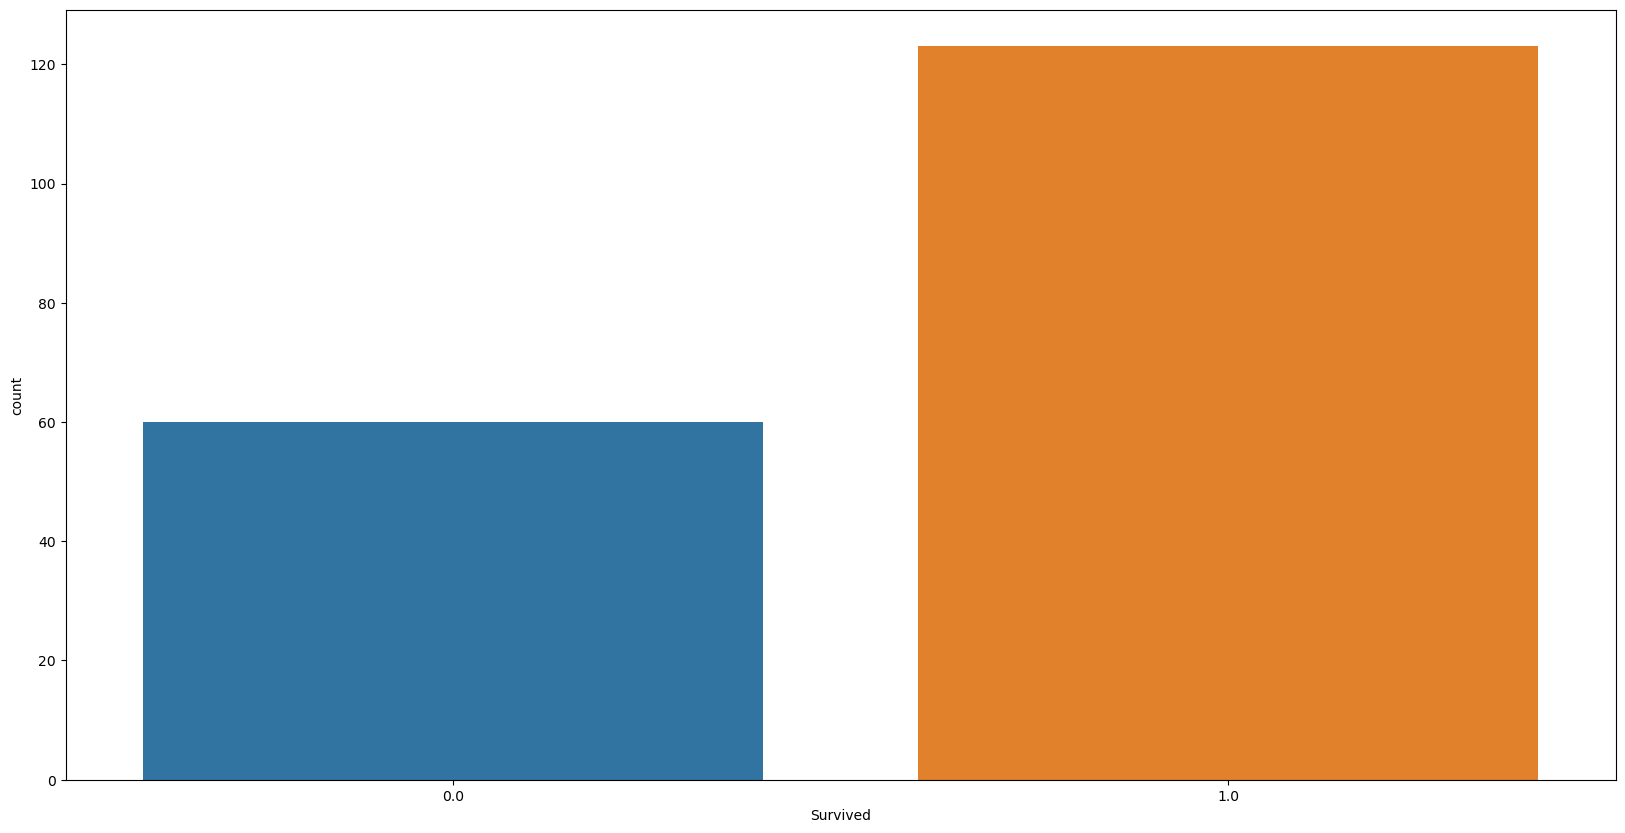

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x='Survived',data=NEW)

<Axes: xlabel='Pclass', ylabel='count'>

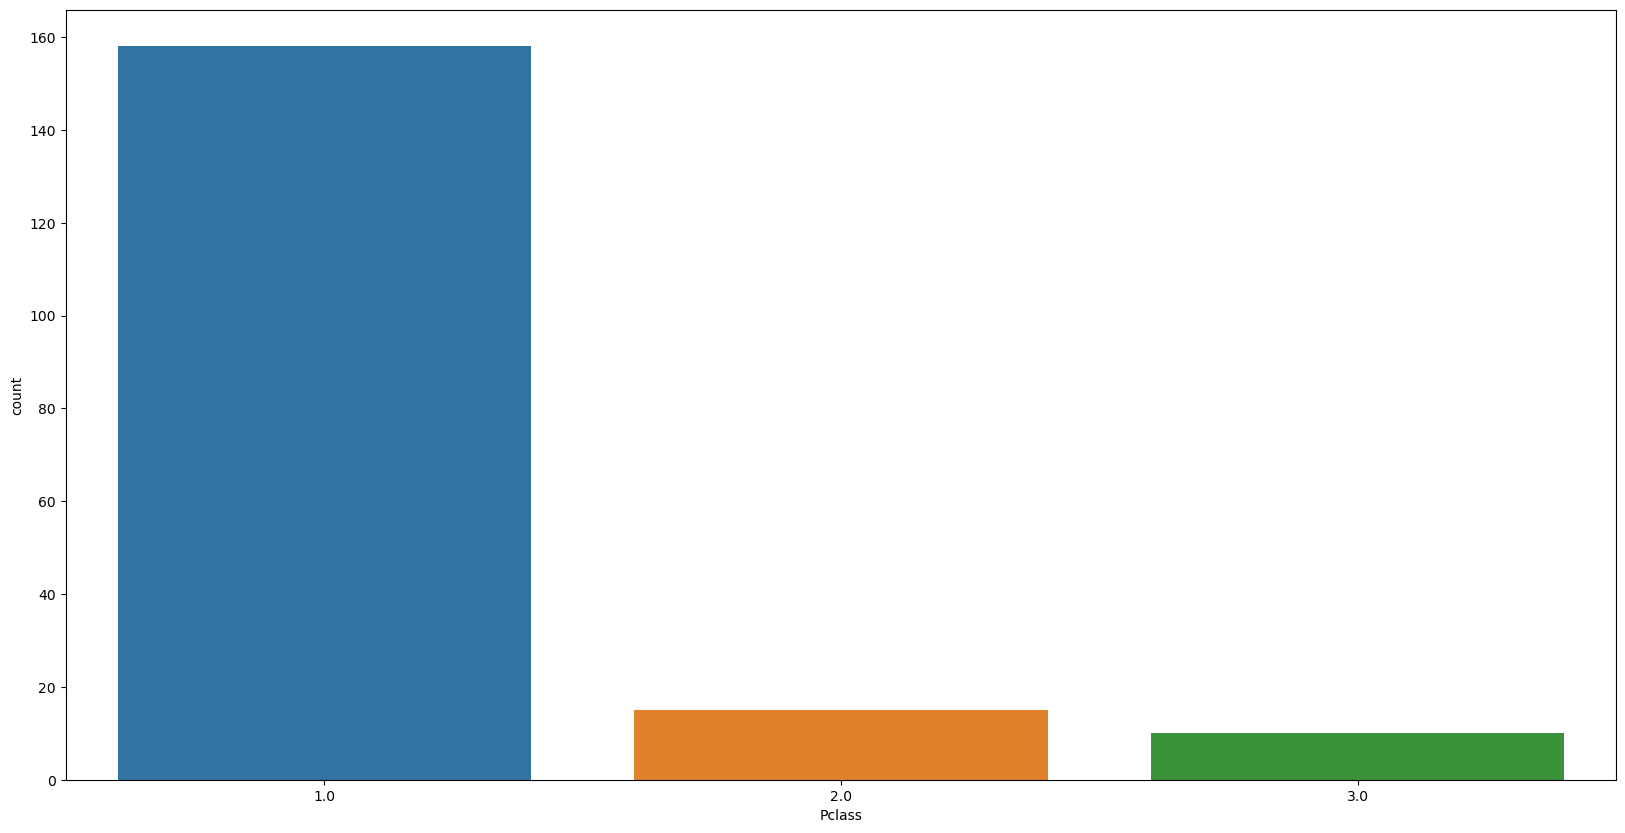

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x='Pclass',data=NEW)

<Axes: xlabel='Sex', ylabel='count'>

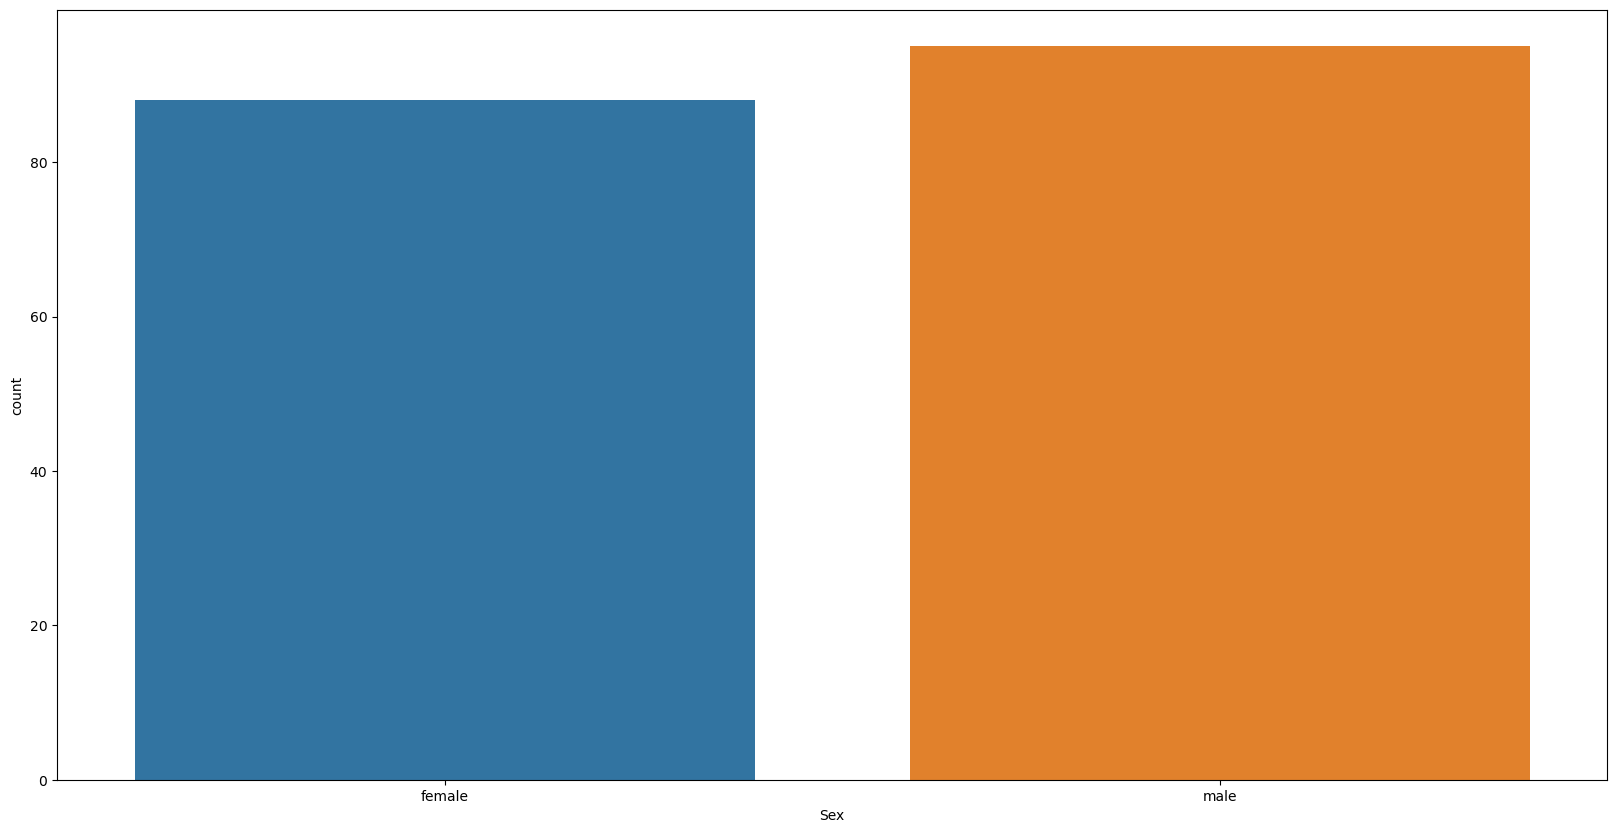

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sex',data=NEW)

<Axes: xlabel='SibSp', ylabel='count'>

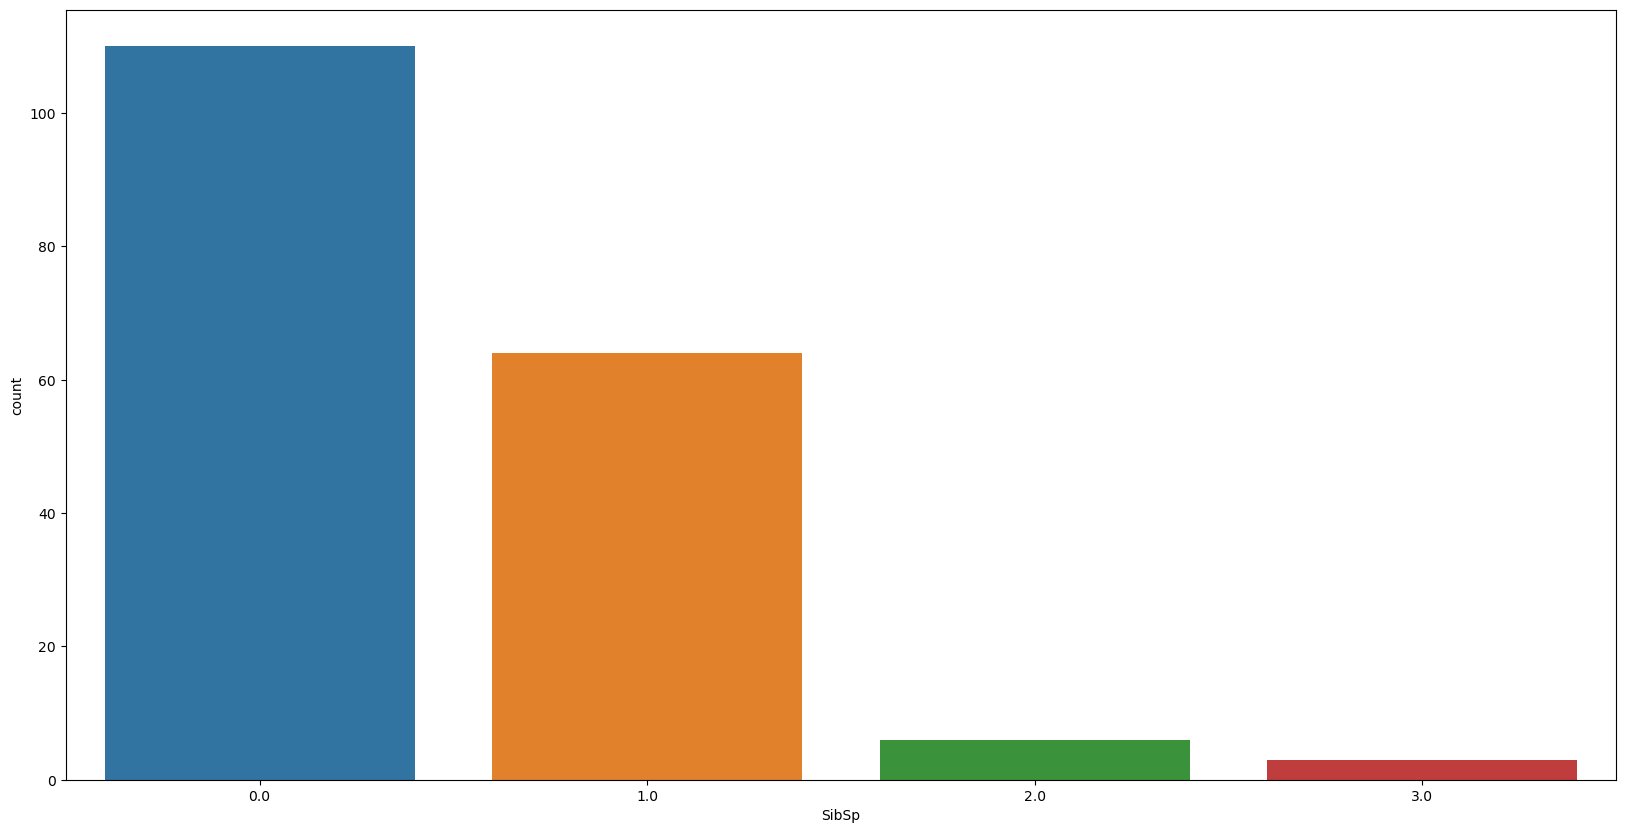

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x='SibSp',data=NEW)

<Axes: xlabel='Parch', ylabel='count'>

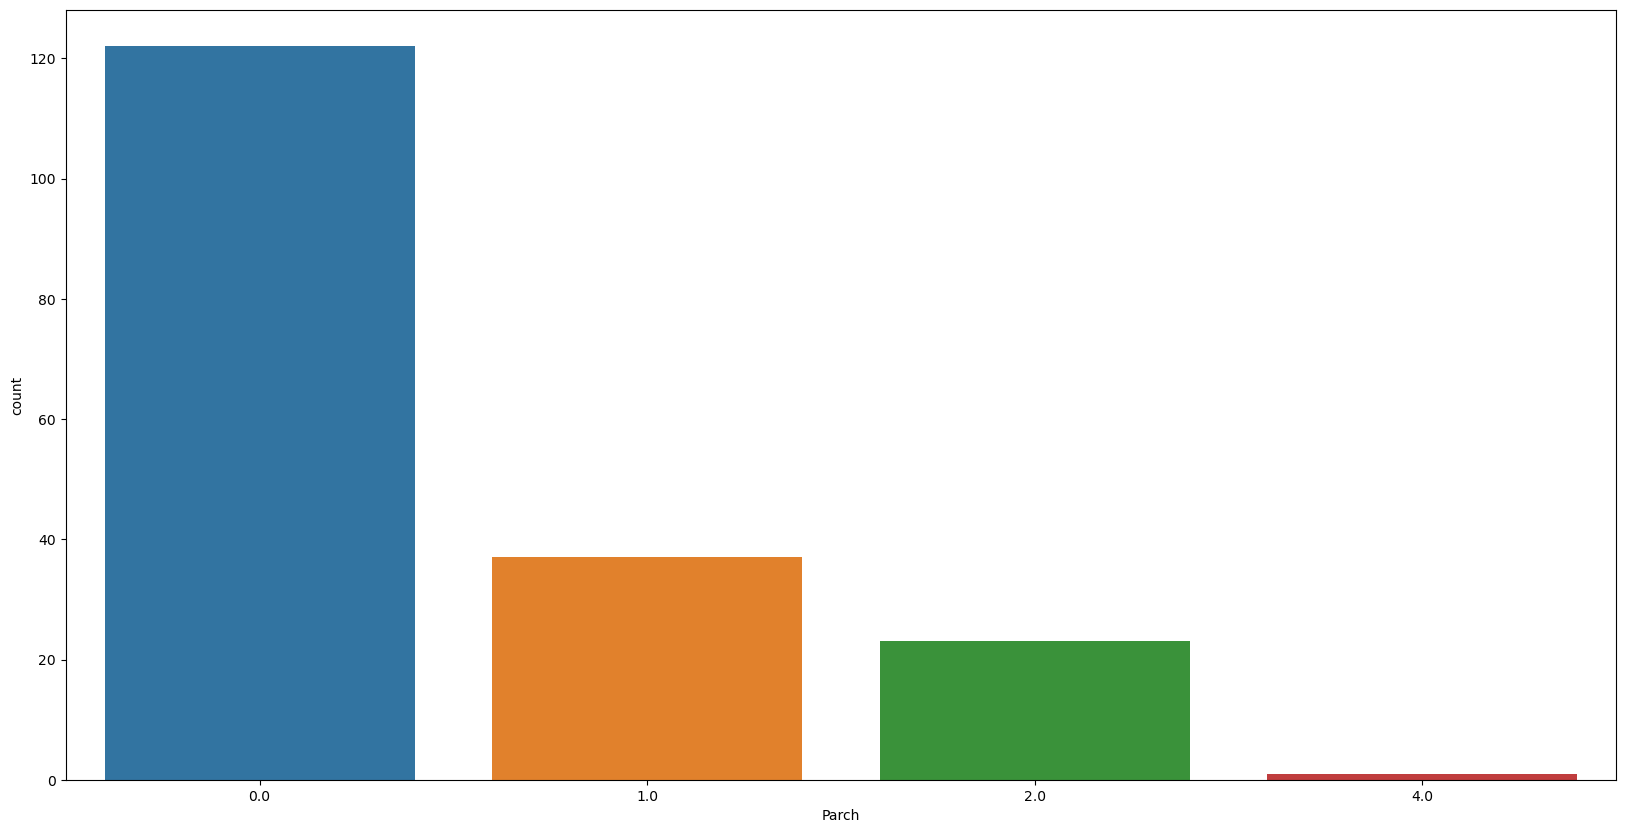

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x='Parch',data=NEW)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

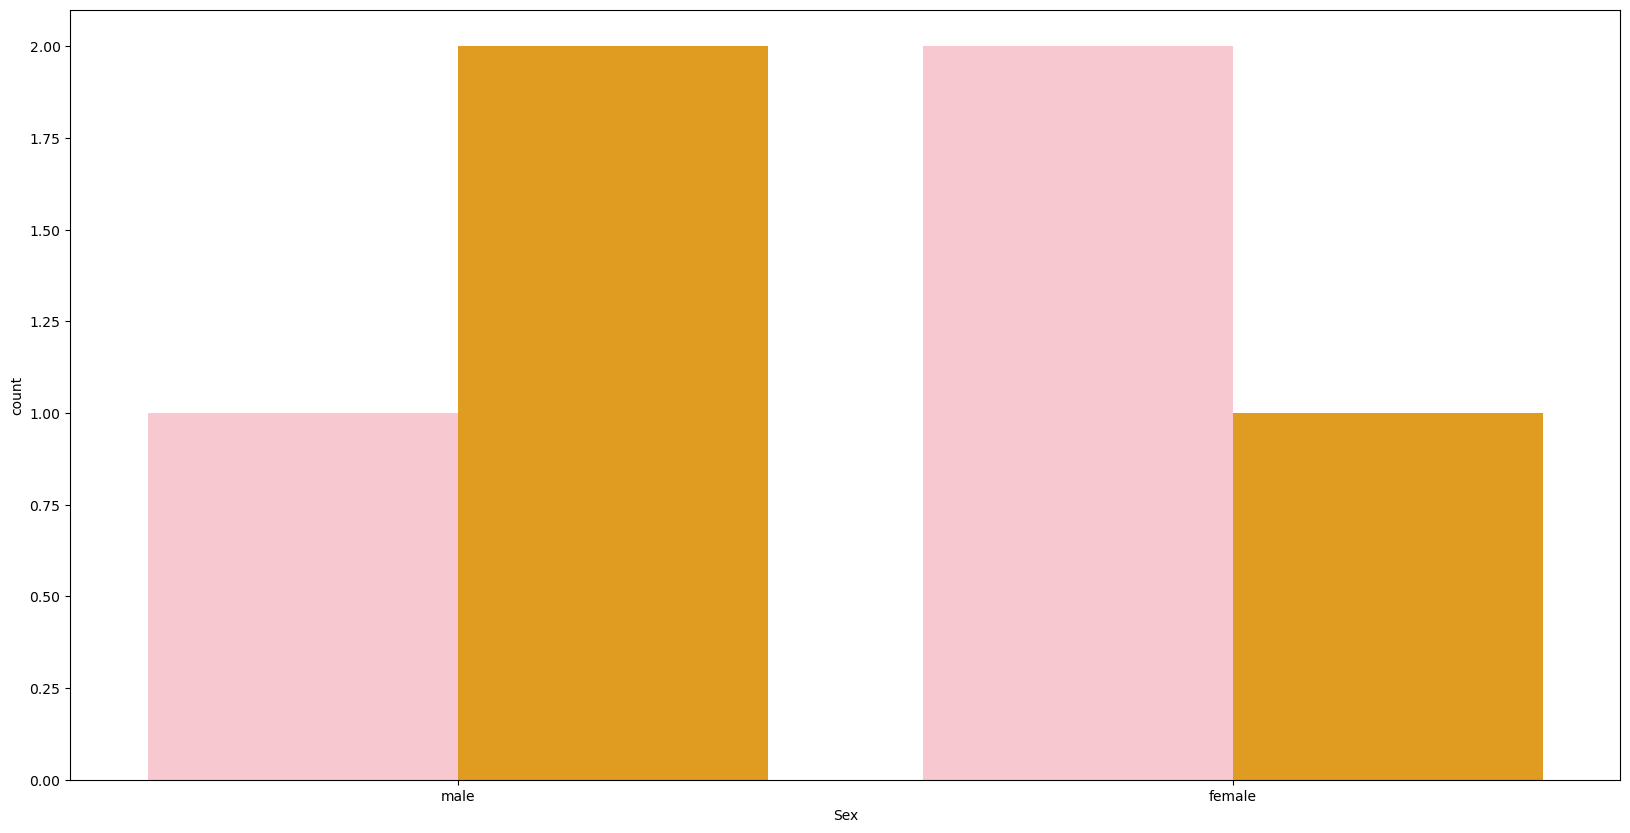

In [114]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sex',hue='Survived',palette=['pink','orange'],data=NEW)

In [53]:
#Convert Columns to categorical if they aren't already
NEW['Sex'] = NEW['Sex'].astype('category')
NEW['Pclass'] = NEW['Pclass'].astype('category')

C:\Users\HP\Documents\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

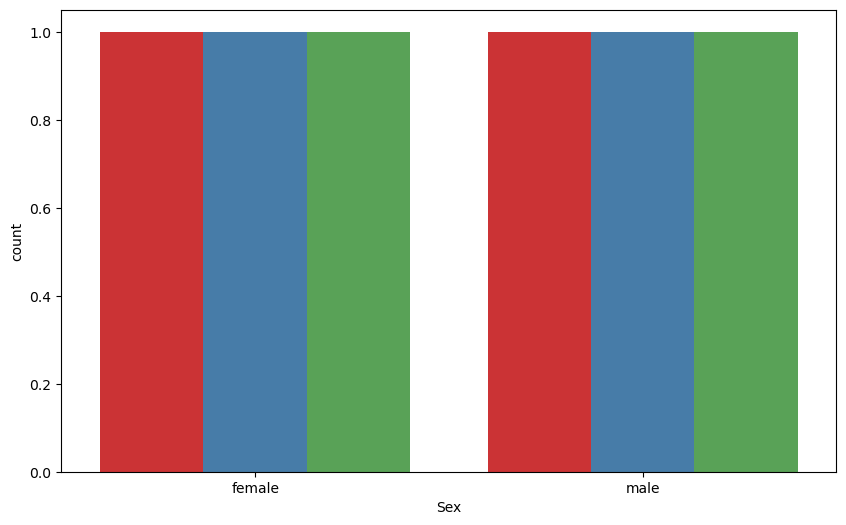

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Pclass', palette='Set1', data=NEW)
plt.show()

Columns in DataFrame:
 Index(['Sex', 'Pclass', 'Survived'], dtype='object')

NaN values in 'Survived' column:
 0


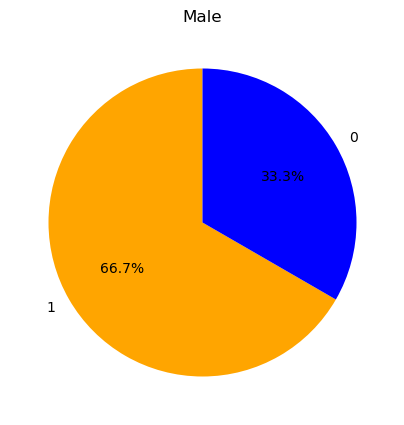

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual data)
NEW = pd.DataFrame({
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [1, 2, 3, 1, 2, 3],
    'Survived': [1, 0, 1, 1, 0, 0]  # Adding a 'Survived' column
})

# Check columns in DataFrame
print("Columns in DataFrame:\n", NEW.columns)

# Check for NaN values in 'Survived' column
print("\nNaN values in 'Survived' column:\n", NEW['Survived'].isnull().sum())

# Ensure 'Survived' column exists and is used correctly
if 'Survived' in NEW.columns:
    plt.figure(figsize=(5, 5))
    NEW[NEW['Sex'] == 'male']['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'b'])
    plt.title('Male')
    plt.ylabel('')
    plt.show()
else:
    print("The 'Survived' column does not exist in the DataFrame.")

Columns in DataFrame:
 Index(['Sex', 'Pclass', 'Survived'], dtype='object')

NaN values in 'Survived' column:
 0


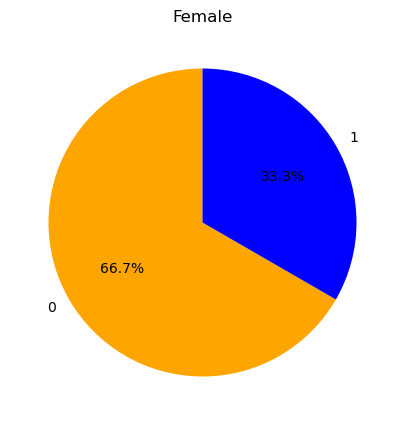

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual data)
NEW = pd.DataFrame({
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [1, 2, 3, 1, 2, 3],
    'Survived': [1, 0, 1, 1, 0, 0]  # Adding a 'Survived' column
})

# Check columns in DataFrame
print("Columns in DataFrame:\n", NEW.columns)

# Check for NaN values in 'Survived' column
print("\nNaN values in 'Survived' column:\n", NEW['Survived'].isnull().sum())

# Ensure 'Survived' column exists and is used correctly
if 'Survived' in NEW.columns:
    plt.figure(figsize=(5, 5))
    NEW[NEW['Sex'] == 'female']['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'b'])
    plt.title('Female')
    plt.ylabel('')
    plt.show()
else:
    print("The 'Survived' column does not exist in the DataFrame.")

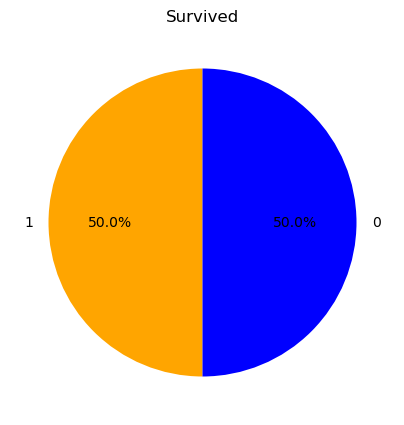

In [65]:
plt.figure(figsize=(5,5))
NEW['Survived'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['orange','b','r'])
plt.title('Survived')
plt.ylabel('')
plt.show()

In [72]:
numerical_NEW = NEW.select_dtypes(include=['number'])
correlation_matrix = numerical_NEW.corr()
print('Correlation Matrix:\n', correlation_matrix)

Correlation Matrix:
             Pclass  Survived
Pclass    1.000000 -0.408248
Survived -0.408248  1.000000


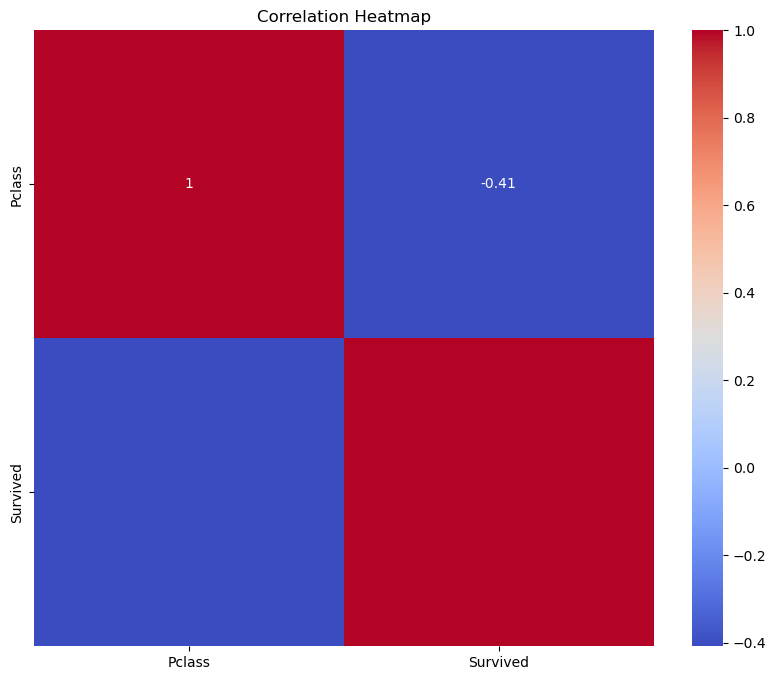

In [71]:
#HEATMAP Creation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [74]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [75]:
def merge_csv(gender_submission,test, train):
    df1 = pd.read_csv(gender_submission)
    df2 = pd.read_csv(test)
    df3 = pd.read_csv(train)
    return pd.concat([df1,df2,df3], ignore_index=True)

merged = merge_csv('gender_submission.csv','test.csv','train.csv')
merged.to_csv('merged.csv',index=False)
merged.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,897,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,898,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,900,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#dropping some of the columns
NEW1 = merged.drop(columns = ['PassengerId', 'Name'])
NEW1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1722,0.0,2.0,male,27.0,0.0,0.0,211536,13.00,NaN,S
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.00,B42,S
1724,0.0,3.0,female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
1725,1.0,1.0,male,26.0,0.0,0.0,111369,30.00,C148,C


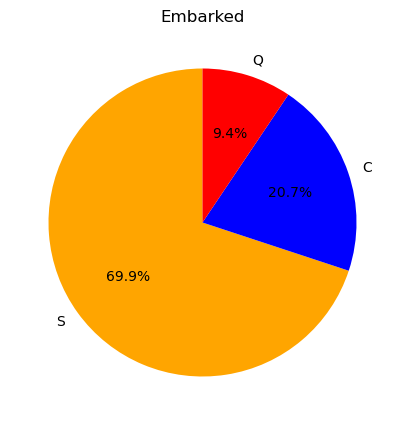

In [79]:
plt.figure(figsize=(5,5))
NEW1['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['orange','b','r'])
plt.title('Embarked')
plt.ylabel('')
plt.show()

In [80]:
numerical_NEW1 = NEW1.select_dtypes(include=['number'])
correlation_matrix = numerical_NEW1.corr()
print('Correlation Matrix:\n', correlation_matrix)

Correlation Matrix:
           Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629
Age      -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740
SibSp    -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238
Parch     0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539
Fare      0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000


In [82]:
teenagers = NEW1[(NEW1['Age'] > 0) & (NEW1['Age'] < 41)]
teenagers

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
418,NaN,3.0,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
421,NaN,3.0,male,27.0,0.0,0.0,315154,8.6625,NaN,S
422,NaN,3.0,female,22.0,1.0,1.0,3101298,12.2875,NaN,S
423,NaN,3.0,male,14.0,0.0,0.0,7538,9.2250,NaN,S
424,NaN,3.0,female,30.0,0.0,0.0,330972,7.6292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
1721,0.0,3.0,female,39.0,0.0,5.0,382652,29.1250,NaN,Q
1722,0.0,2.0,male,27.0,0.0,0.0,211536,13.0000,NaN,S
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.0000,B42,S
1725,1.0,1.0,male,26.0,0.0,0.0,111369,30.0000,C148,C


In [84]:
men = NEW1[(NEW1['Age'] > 39) & (NEW1['Age'] < 61) ]
men

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,NaN,3.0,female,47.0,1.0,0.0,363272,7.0000,NaN,S
429,NaN,1.0,male,46.0,0.0,0.0,694,26.0000,NaN,S
432,NaN,1.0,female,47.0,1.0,0.0,W.E.P. 5734,61.1750,E31,S
437,NaN,3.0,female,45.0,0.0,0.0,2696,7.2250,NaN,C
438,NaN,1.0,male,55.0,1.0,0.0,PC 17603,59.4000,NaN,C
...,...,...,...,...,...,...,...,...,...,...
1698,1.0,1.0,female,48.0,0.0,0.0,17466,25.9292,D17,S
1701,1.0,2.0,female,42.0,0.0,0.0,236852,13.0000,NaN,S
1707,1.0,1.0,female,47.0,1.0,1.0,11751,52.5542,D35,S
1709,0.0,3.0,male,47.0,0.0,0.0,345765,9.0000,NaN,S


In [85]:
elderly = NEW1[(NEW1['Age'] > 59) & (NEW1['Age'] < 81)]
elderly

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
420,NaN,2.0,male,62.0,0.0,0.0,240276,9.6875,NaN,Q
431,NaN,2.0,male,63.0,1.0,0.0,24065,26.0000,NaN,S
466,NaN,1.0,female,60.0,0.0,0.0,11813,76.2917,D15,C
487,NaN,1.0,female,60.0,1.0,4.0,19950,263.0000,C23 C25 C27,S
499,NaN,1.0,male,67.0,1.0,0.0,PC 17483,221.7792,C55 C57,S
514,NaN,1.0,female,76.0,1.0,0.0,19877,78.8500,C46,S
532,NaN,1.0,female,63.0,1.0,0.0,PC 17483,221.7792,C55 C57,S
560,NaN,1.0,male,61.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,C
570,NaN,3.0,male,60.5,0.0,0.0,3701,NaN,NaN,S
597,NaN,1.0,female,64.0,0.0,2.0,PC 17756,83.1583,E45,C


In [90]:
NEW1['teenagers'] = teenagers['Age']
NEW1['men'] = men['Age']
NEW1['elderly'] = elderly['Age']
NEW1.to_csv('NEW_with_teenagers.csv', index=False)
NEW1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,teenagers,men,elderly
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.0,2.0,male,27.0,0.0,0.0,211536,13.00,NaN,S,27.0,NaN,NaN
1723,1.0,1.0,female,19.0,0.0,0.0,112053,30.00,B42,S,19.0,NaN,NaN
1724,0.0,3.0,female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S,NaN,NaN,NaN
1725,1.0,1.0,male,26.0,0.0,0.0,111369,30.00,C148,C,26.0,NaN,NaN


In [91]:
numerical_NEW1 = NEW1.select_dtypes(include=['number'])
correlation_matrix = numerical_NEW1.corr()
print('Correlation Matrix:\n', correlation_matrix)

Correlation Matrix:
            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived   1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass    -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629   
Age       -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740   
SibSp     -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238   
Parch      0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539   
Fare       0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000   
teenagers -0.079349 -0.222628  1.000000 -0.341292 -0.258843  0.078088   
men        0.043768 -0.316371  1.000000  0.073861 -0.084976  0.226259   
elderly   -0.098157  0.021163  1.000000 -0.126976 -0.174308 -0.143150   

           teenagers       men   elderly  
Survived   -0.079349  0.043768 -0.098157  
Pclass     -0.222628 -0.316371  0.021163  
Age         1.000000  1.000000  1.000000  
SibSp      -0.341292  0.073861 -0.126976  
Parch      -0.258843 -0.084976 -0

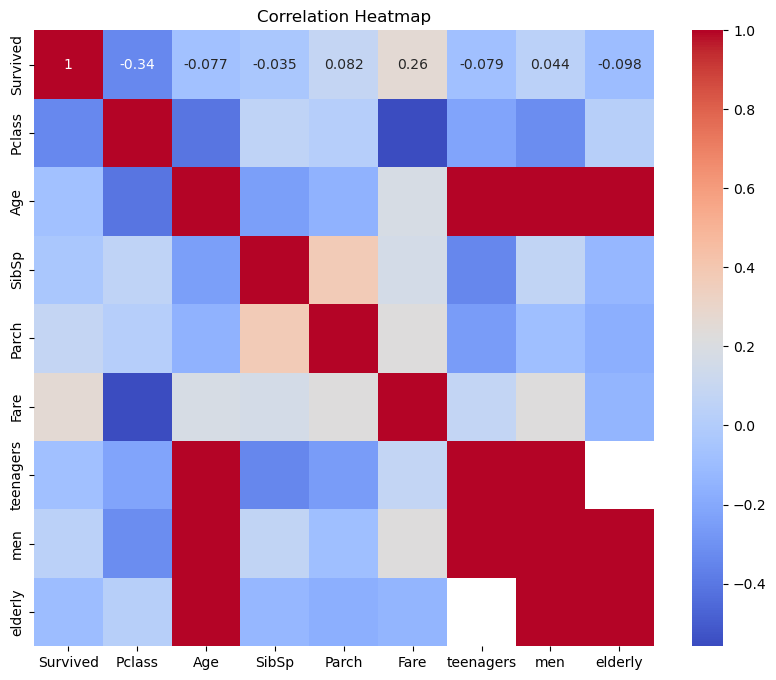

In [92]:
#Correlation HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [94]:
len(X_train)

120

In [95]:
len(X_test)

30

In [98]:
#Initiating KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
knn.score(X_test, y_test)

1.0

In [101]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [102]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [103]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [106]:
rf.score(X_test, y_test)

1.0

In [107]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)
print(metrics.classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



C:\Users\HP\Documents\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\Documents\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\Documents\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
log = LogisticRegression()
log.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [110]:
print(metrics.confusion_matrix(y_test, y_pred_classes))

[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]


In [112]:
print("Thanks")

Thanks
